<a href="https://colab.research.google.com/github/SergeyShchus/OSM/blob/main/Notebook/OSMX_4_Simplify_network_topology_and_consolidate_intersections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install osmnx

In [2]:
import networkx as nx
import osmnx as ox

%matplotlib inline
ox.__version__

'1.1.2'

# Complex intersection consolidation

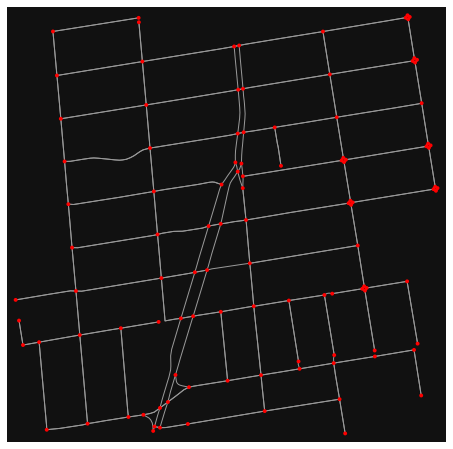

In [3]:
# get a street network and plot it with all edge intersections
point = 37.858495, -122.267468
G = ox.graph_from_point(point, network_type="drive", dist=500)
fig, ax = ox.plot_graph(G, node_color="r")

In [4]:
# get a GeoSeries of consolidated intersections
G_proj = ox.project_graph(G)
ints = ox.consolidate_intersections(G_proj, rebuild_graph=False, tolerance=15, dead_ends=False)
len(ints)

66

In [5]:
# compare to number of nodes in original graph
len(G)

109

In [6]:
# consolidate intersections and rebuild graph topology
# this reconnects edge geometries to the new consolidated nodes
G2 = ox.consolidate_intersections(G_proj, rebuild_graph=True, tolerance=15, dead_ends=False)
len(G2)

66

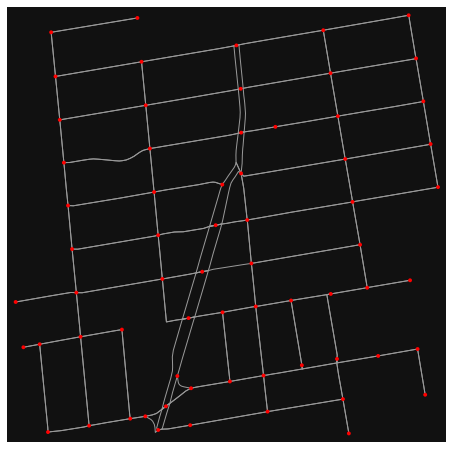

In [7]:
fig, ax = ox.plot_graph(G2, node_color="r")

## Graph simplification

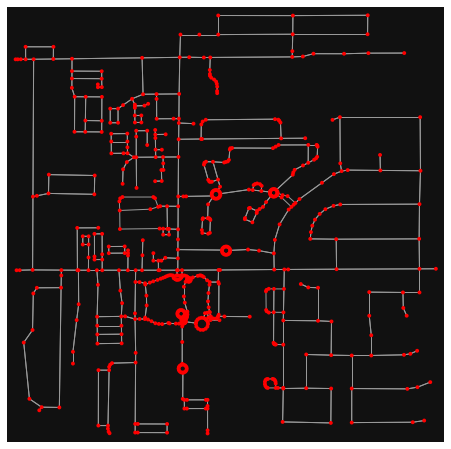

In [8]:
# create a network around some (lat, lng) point and plot it
location_point = (33.299896, -111.831638)
G = ox.graph_from_point(location_point, dist=500, simplify=False)
fig, ax = ox.plot_graph(G, node_color="r")

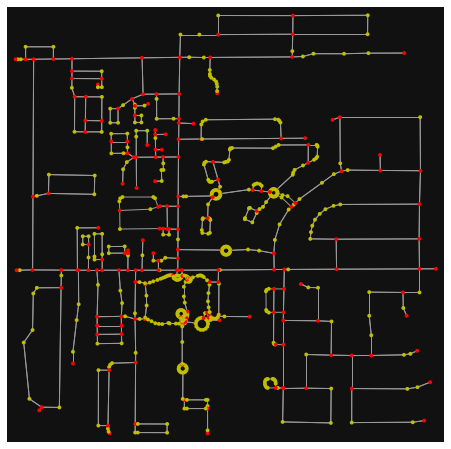

In [9]:
# show which nodes we'd remove if we simplify it (yellow)
nc = ["r" if ox.simplification._is_endpoint(G, node) else "y" for node in G.nodes()]
fig, ax = ox.plot_graph(G, node_color=nc)

In [10]:
# simplify the network
G2 = ox.simplify_graph(G)

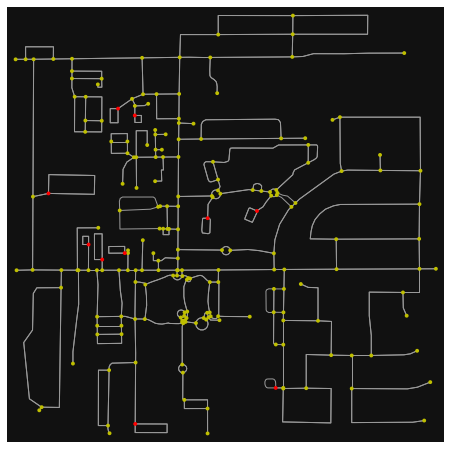

In [11]:
# plot the simplified network and highlight any self-loop edges
loops = [edge[0] for edge in nx.selfloop_edges(G2)]
nc = ["r" if node in loops else "y" for node in G2.nodes()]
fig, ax = ox.plot_graph(G2, node_color=nc)

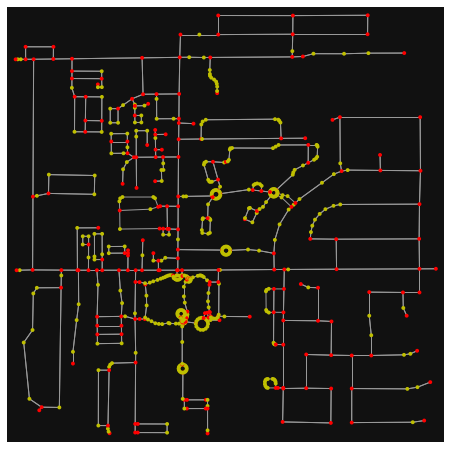

In [12]:
# turn off strict mode and see what nodes we'd remove
nc = ["r" if ox.simplification._is_endpoint(G, node, strict=False) else "y" for node in G.nodes()]
fig, ax = ox.plot_graph(G, node_color=nc)

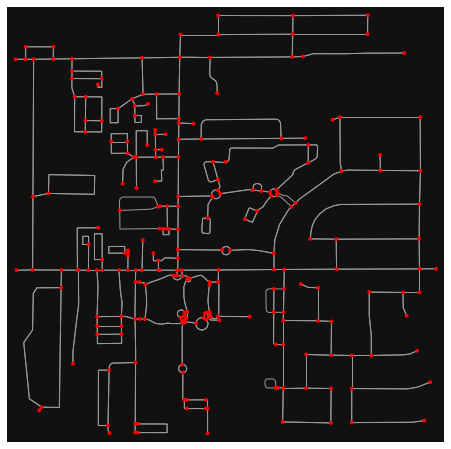

In [13]:
# simplify network with strict mode turned off
G3 = ox.simplify_graph(G.copy(), strict=False)
fig, ax = ox.plot_graph(G3, node_color="r")

## Cleaning up the periphery of the network

In [14]:
# get some bbox
bbox = ox.utils_geo.bbox_from_point((45.518698, -122.679964), dist=300)
north, south, east, west = bbox

/usr/local/lib/python3.7/dist-packages/osmnx/graph.py:478: UserWarning: the graph-level street_count attribute will likely be inaccurate when you set clean_periphery=False
  warnings.warn(msg)


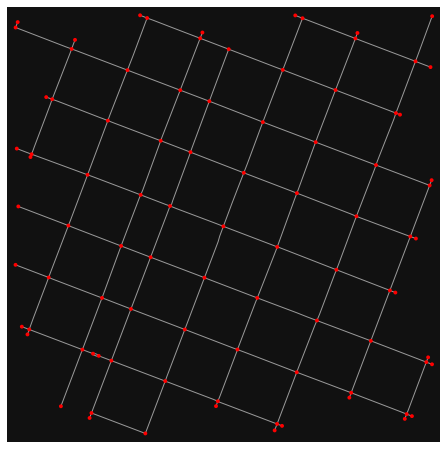

In [15]:
G = ox.graph_from_bbox(north, south, east, west, network_type="drive", clean_periphery=False)
fig, ax = ox.plot_graph(G, node_color="r")

In [16]:
# the node degree distribution for this graph has many false cul-de-sacs
k = dict(G.degree())
{n: list(k.values()).count(n) for n in range(max(k.values()) + 1)}

{0: 0, 1: 29, 2: 2, 3: 7, 4: 51}

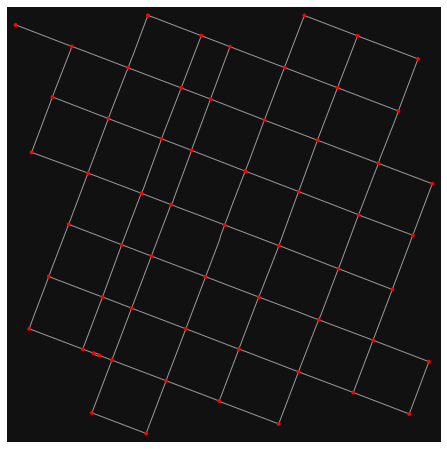

In [17]:
G = ox.graph_from_bbox(north, south, east, west, network_type="drive")
fig, ax = ox.plot_graph(G, node_color="r")

In [18]:
# the streets per node distribution for this cleaned up graph is more accurate
# dict keys = count of streets emanating from the node (ie, intersections and dead-ends)
# dict vals = number of nodes with that count
k = nx.get_node_attributes(G, "street_count")
{n: list(k.values()).count(n) for n in range(max(k.values()) + 1)}

{0: 0, 1: 0, 2: 0, 3: 3, 4: 57}

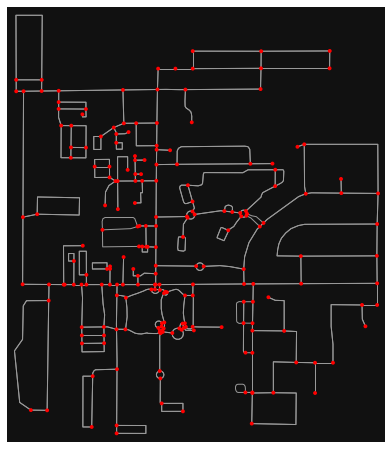

In [19]:
location_point = (33.299896, -111.831638)
G = ox.graph_from_point(location_point, dist=500, simplify=True)
fig, ax = ox.plot_graph(G, node_color="r")